# Classify the films using Logistic Regression

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
# Load the dataset
df = pd.read_csv("data/movies_2015_2023_preprocessed_genre.csv")
df.head()

,title,release_year,language,genre,overview,vote_average,vote_count,popularity,cleaned_overview
0,Pad Man,2018,Indisch,Humor,upon realizing extent woman affected menses se...,7.420,200.0,7.036,upon realizing extent woman affected menses se...
1,Tamasha,2015,Indisch,Humor,meeting vacation ved tara sense connection vow...,6.720,141.0,8.770,meeting vacation ved tara sense connection vow...
2,Tu Jhoothi Main Makkaar,2023,Indisch,Humor,earn extra cash mickey help couple break life ...,6.253,144.0,10.045,earn extra cash mickey help couple break life ...
3,Hindi Medium,2017,Indisch,Humor,mita raj batra affluent couple delhi chandni c...,7.300,166.0,7.001,mita raj batra affluent couple delhi chandni c...
4,Dilwale,2015,Indisch,Humor,raj mafia member one day meet girl meera chasi...,6.648,301.0,11.501,raj mafia member one day meet girl meera chasi...


In [3]:
# Überprüfe auf fehlende Werte in den Spalten 'cleaned_overview' und 'genre'
missing_cleaned_overview = df['cleaned_overview'].isnull().sum()
missing_genre = df['genre'].isnull().sum()

# Ausgabe der Anzahl der fehlenden Werte in beiden Spalten
print(f"Fehlende Werte in 'cleaned_overview': {missing_cleaned_overview}")
print(f"Fehlende Werte in 'genre': {missing_genre}")


Fehlende Werte in 'cleaned_overview': 1
Fehlende Werte in 'genre': 0


In [4]:
# Entferne Zeilen mit fehlenden Werten in der Spalte 'cleaned_overview'
df_cleaned = df.dropna(subset=['cleaned_overview'])

# Überprüfe, ob die fehlenden Werte erfolgreich entfernt wurden
print(f"Fehlende Werte in 'cleaned_overview' nach der Bereinigung: {df_cleaned['cleaned_overview'].isnull().sum()}")


Fehlende Werte in 'cleaned_overview' nach der Bereinigung: 0


Define features and goals

In [5]:
# Define the features (cleaned_overview) and the goal (language)
X = df_cleaned['cleaned_overview'] + ' ' + df_cleaned['genre']
y = df_cleaned['language']


In [6]:
# Divide the data into training and test sets (80% training, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Engineering: CountVectorizer

In [7]:
# Initialize the CountVectorizer for Bag-of-Words
vectorizer = CountVectorizer(max_features=5000)

# Convert the text into numerical features (Bag-of-Words)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [8]:
# Definiere das Modell und die Parameter für das Grid Search
log_reg = LogisticRegression(max_iter=1000)

# Erweitertes Parameterraster (Grid) für Grid Search
param_grid_reduced = {
    'C': [1, 10, 100],  # Erweiterung auf mehrere Werte für den Regularisierungsparameter C
    'solver': ['liblinear'],  # Zwei verschiedene Solver
    'penalty': ['l2','l1'],  # L2-Regularisierung
    'class_weight': [None, 'balanced']  # Option zum Ausgleich der Klassenverteilung
}


# Grid Search anwenden
grid_search_reduced = GridSearchCV(log_reg, param_grid_reduced, cv=5, verbose=1)
grid_search_reduced.fit(X_train_vec, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1, 10, 100], 'class_weight': [None, 'balanced'],
                         'penalty': ['l2', 'l1'], 'solver': ['liblinear']},
             verbose=1)

In [9]:
# Vorhersagen auf dem Testset
y_pred = grid_search_reduced.predict(X_test_vec)

# Genauigkeit berechnen
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6761290322580645


In [10]:
# Make predictions for the test data
#y_pred = logreg.predict(X_test)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)


              precision    recall  f1-score   support

Amerikanisch       0.73      0.80      0.76       905
     Deutsch       0.62      0.58      0.60       359
 Französisch       0.66      0.59      0.63       529
     Indisch       0.75      0.74      0.75       366
 Italienisch       0.63      0.52      0.57       312
    Spanisch       0.61      0.67      0.64       629

    accuracy                           0.68      3100
   macro avg       0.67      0.65      0.66      3100
weighted avg       0.67      0.68      0.67      3100



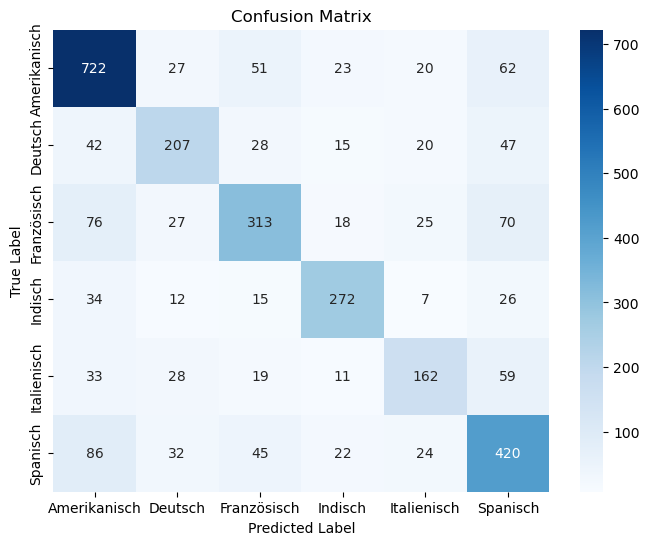

In [11]:
# Confusion Matrix berechnen
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix visualisieren
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=grid_search_reduced.classes_, 
            yticklabels=grid_search_reduced.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


TF-IDF (Term Frequency-Inverse Document Frequency)

In [12]:
# Divide the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [14]:
# Definiere das Modell und die Parameter für das Grid Search
log_reg = LogisticRegression(max_iter=1000)

# Erweitertes Parameterraster (Grid) für Grid Search
param_grid_reduced = {
    'C': [1, 10, 100],  # Erweiterung auf mehrere Werte für den Regularisierungsparameter C
    'solver': ['liblinear'],  # Zwei verschiedene Solver
    'penalty': ['l2','l1'],  # L2-Regularisierung
    'class_weight': [None, 'balanced']  # Option zum Ausgleich der Klassenverteilung
}

# Grid Search anwenden
grid_search_reduced = GridSearchCV(log_reg, param_grid_reduced, cv=5, verbose=1)
grid_search_reduced.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1, 10, 100], 'class_weight': [None, 'balanced'],
                         'penalty': ['l2', 'l1'], 'solver': ['liblinear']},
             verbose=1)

In [15]:
# Vorhersagen auf dem Testset
y_pred = grid_search_reduced.predict(X_test_tfidf)

# Genauigkeit berechnen
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6896774193548387


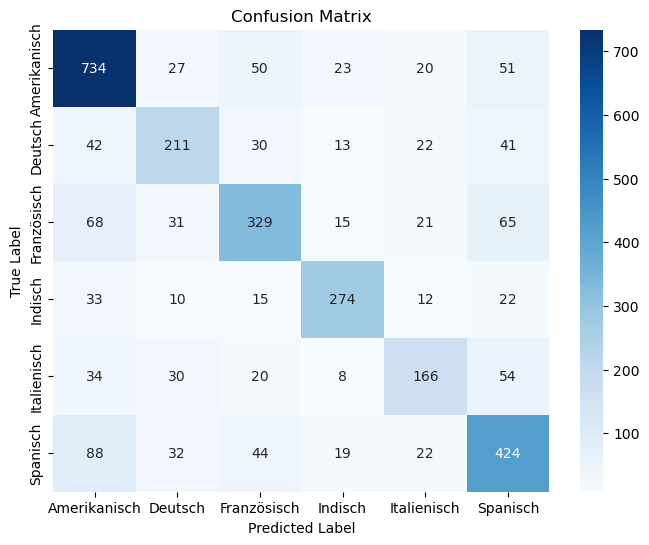

In [16]:
# Confusion Matrix berechnen
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix visualisieren
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=grid_search_reduced.classes_, 
            yticklabels=grid_search_reduced.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()